# Zomato data analysis project

### Importing necessry libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading our DataFrame


In [2]:
df = pd.read_csv('Zomato.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.shape

(148, 7)

In [4]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144    False
145    False
146    False
147    False
Length: 148, dtype: bool

In [7]:
df.drop_duplicates(inplace = True)

## Cleaning Data
- We need to clean the rating first, that is to remove /5
- then we need to convert the ratings in float

### Convert the data type of column - rate

In [8]:
df['rate'] = df['rate'].str.split('/').str[0].astype(float)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [11]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


# Type of resturant

Text(0.5, 0, 'Type of restaurant')

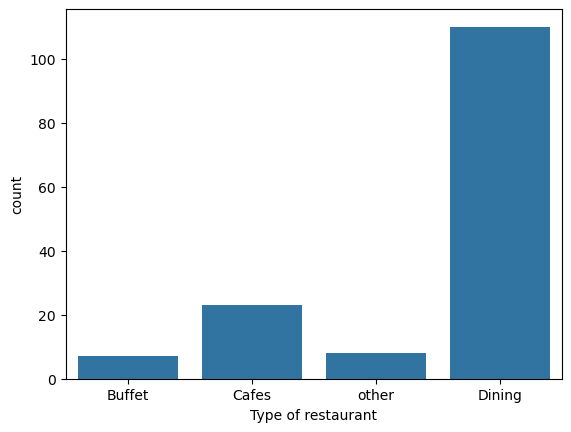

In [12]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('Type of restaurant')

Conclusion - majority type of restaurants falls in dinning category followed by cafes

Text(0, 0.5, 'Votes')

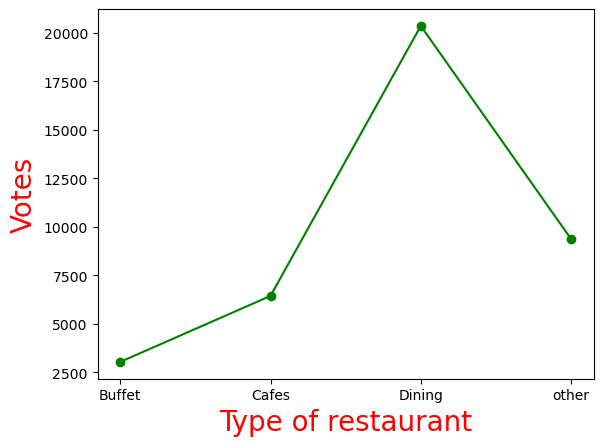

In [14]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker = 'o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size = 20)

Conclusion - dinning resturants have gained maximum votes

### ratings

In [15]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'rating distribution')

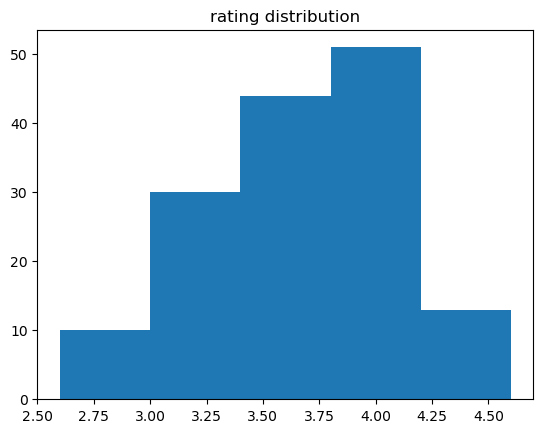

In [16]:
plt.hist(df['rate'], bins = 5)
plt.title('rating distribution')


Conclusion - Majority resturants recived ratings from 3.5 to 4

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### Average order spending for couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

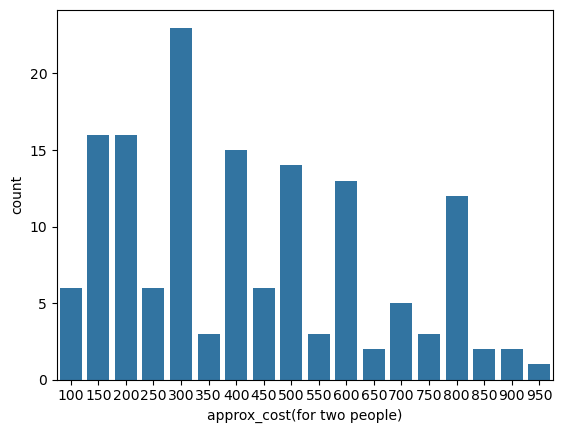

In [18]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion - the majority of couples prefer resturants with an approximate cost of 300Rs

### Which mode recives maximum rating

In [19]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

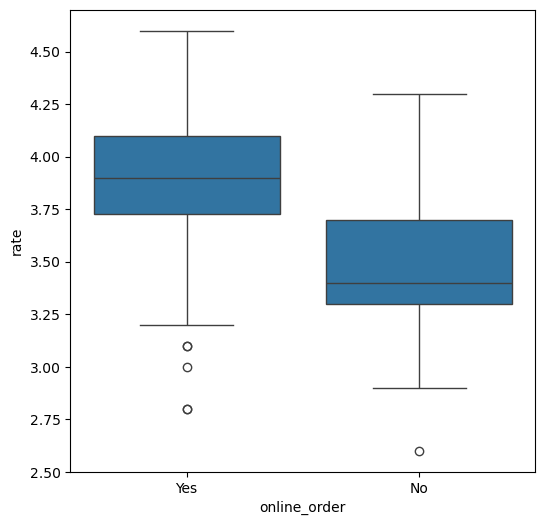

In [20]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

Conclusion - offline order recived lower rating in comparison to online rating

### Which type of resturant recived more offline order

Text(50.722222222222214, 0.5, 'listed_in(type)')

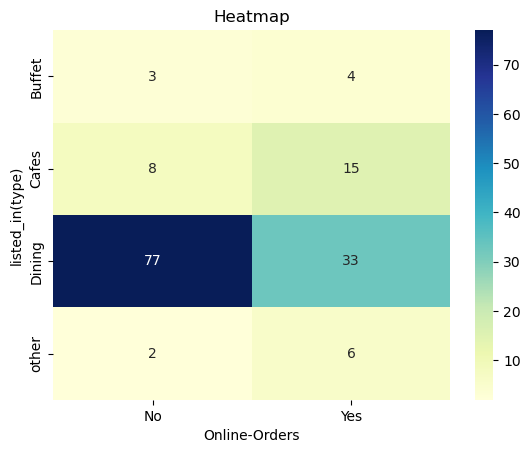

In [23]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title('Heatmap')
plt.xlabel('Online-Orders')
plt.ylabel('listed_in(type)')

Conclusion - Dinning resturants primarily accept offline orders, whereas cafes primarily recive online orders. This suggest the clients prefer to place order in person at resturants, but prefer online ordering at cafe